In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
from google.colab import files
  
uploaded = files.upload()

Saving IBM.csv to IBM.csv


In [3]:
df = pd.read_csv('IBM.csv')
df.head(-5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-06-05,13.892208,13.951960,13.593451,13.623327,4.504086,2735081
1,1980-06-06,13.653203,13.832457,13.653203,13.653203,4.513962,1353106
2,1980-06-09,13.653203,13.742830,13.533700,13.563576,4.484333,1330094
3,1980-06-10,13.563576,13.802581,13.533700,13.742830,4.543598,1548080
4,1980-06-11,13.742830,13.951960,13.683078,13.862333,4.583107,2138861
...,...,...,...,...,...,...,...
10435,2021-10-22,122.418739,124.521988,121.042068,122.256210,122.256210,12114981
10436,2021-10-25,121.921608,122.992355,121.357552,122.026772,122.026772,6667204
10437,2021-10-26,121.912048,122.657745,121.185471,121.539200,121.539200,8912861
10438,2021-10-27,121.835564,122.256210,119.512428,119.665390,119.665390,7294176


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10445 entries, 0 to 10444
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10445 non-null  object 
 1   Open       10445 non-null  float64
 2   High       10445 non-null  float64
 3   Low        10445 non-null  float64
 4   Close      10445 non-null  float64
 5   Adj Close  10445 non-null  float64
 6   Volume     10445 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 571.3+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10445.000000,10445.000000,10445.000000,10445.000000,10445.000000,1.044500e+04
mean,79.714486,80.462046,79.005797,79.739367,55.715512,6.917879e+06
std,54.875264,55.279987,54.501255,54.899031,45.394472,4.511500e+06
min,9.799235,9.978489,9.709608,9.799235,4.149564,0.000000e+00
25%,27.127151,27.336281,26.888145,27.127151,12.582995,4.095822e+06
50%,79.063095,79.894836,78.365204,79.110901,50.257805,5.857286e+06
75%,122.695984,123.661568,121.663483,122.801147,101.108559,8.411304e+06
max,205.908218,206.405350,204.875717,206.309753,149.120041,7.263916e+07


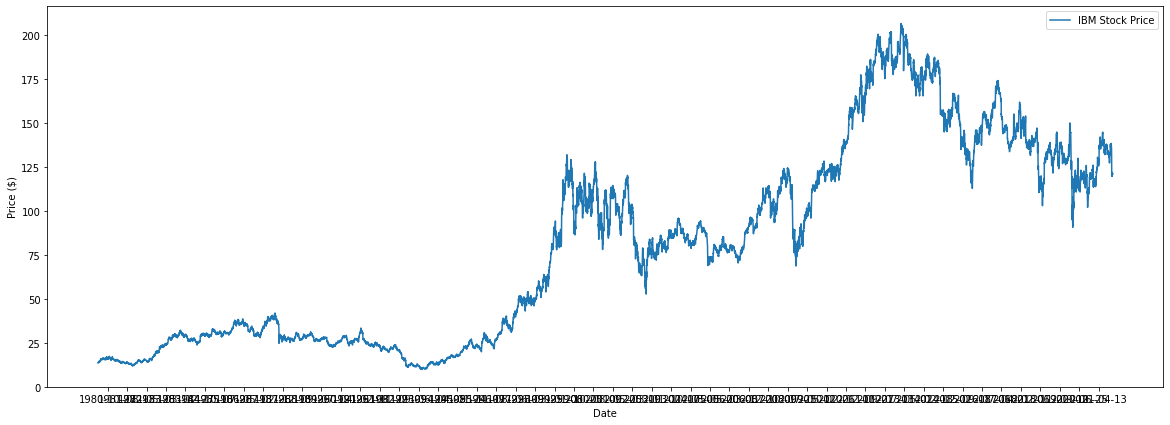

In [6]:
df['Close'] = df['Close'].astype(float)

plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['Close'].values, label = 'IBM Stock Price')
plt.xticks(np.arange(100,df.shape[0],200))
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [7]:
num_shape = 10000

train = df.iloc[:num_shape, 1:2].values
test = df.iloc[num_shape:, 1:2].values

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)

In [9]:
X_train = []

y_train = []

window = 60

for i in range(window, num_shape):
    X_train_ = np.reshape(train_scaled[i-window:i, 0], (window, 1))
    X_train.append(X_train_)
    y_train.append(train_scaled[i, 0])
X_train = np.stack(X_train)
y_train = np.stack(y_train)

# **Menggunakan model LSTM**

In [10]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 20, batch_size = 32);

Epoch 1/20
311/311 [==============================] - 30s 60ms/step - loss: 0.0057
Epoch 2/20
311/311 [==============================] - 19s 60ms/step - loss: 0.0022
Epoch 3/20
311/311 [==============================] - 19s 60ms/step - loss: 0.0019
Epoch 4/20
311/311 [==============================] - 19s 60ms/step - loss: 0.0016
Epoch 5/20
311/311 [==============================] - 19s 60ms/step - loss: 0.0015
Epoch 6/20
311/311 [==============================] - 19s 60ms/step - loss: 0.0014
Epoch 7/20
311/311 [==============================] - 19s 60ms/step - loss: 0.0013
Epoch 8/20
311/311 [==============================] - 19s 60ms/step - loss: 0.0012
Epoch 9/20
311/311 [==============================] - 19s 60ms/step - loss: 0.0011
Epoch 10/20
311/311 [==============================] - 19s 60ms/step - loss: 0.0011
Epoch 11/20
311/311 [==============================] - 19s 60ms/step - loss: 9.9460e-04
Epoch 12/20
311/311 [==============================] - 19s 60ms/step - loss: 0.00

In [12]:
df_volume = np.vstack((train, test))

inputs = df_volume[df_volume.shape[0] - test.shape[0] - window:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

num_2 = df_volume.shape[0] - num_shape + window

X_test = []

for i in range(window, num_2):
    X_test_ = np.reshape(inputs[i-window:i, 0], (window, 1))
    X_test.append(X_test_)
    
X_test = np.stack(X_test)

In [13]:
predict = model.predict(X_test)
predict = sc.inverse_transform(predict)

In [14]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 20.690300099979673
MAE: 3.1267308885413017
RMSE: 4.548659154078229


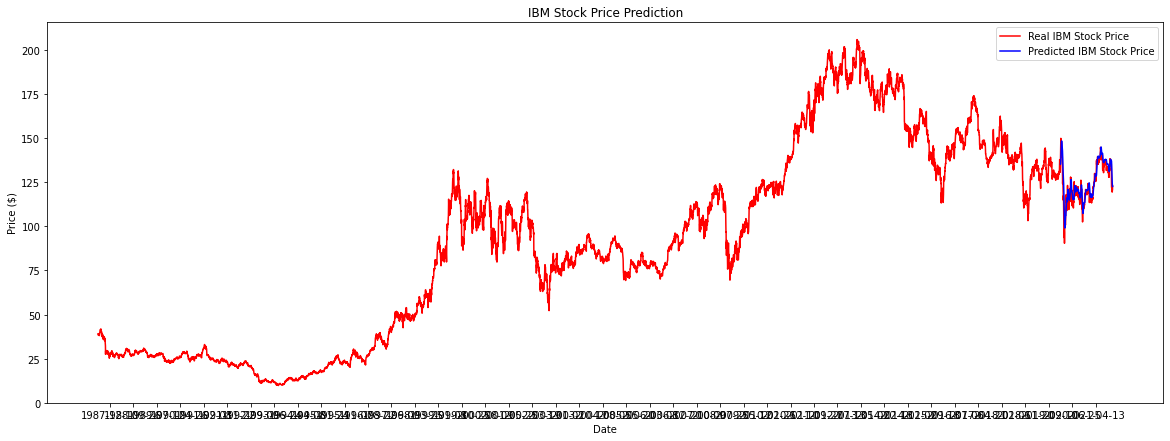

In [15]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1800:], df_volume[1800:], color = 'red', label = 'Real IBM Stock Price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted IBM Stock Price')
plt.xticks(np.arange(100,df[1800:].shape[0],200))
plt.title('IBM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# **GRU**

In [16]:
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 50)            7950      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 50)               

In [17]:
modelGRU.compile(optimizer='sgd', loss='mean_squared_error')
modelGRU.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
311/311 [==============================] - 24s 58ms/step - loss: 0.0256
Epoch 2/20
311/311 [==============================] - 18s 57ms/step - loss: 0.0034
Epoch 3/20
311/311 [==============================] - 18s 58ms/step - loss: 0.0031
Epoch 4/20
311/311 [==============================] - 18s 57ms/step - loss: 0.0027
Epoch 5/20
311/311 [==============================] - 18s 57ms/step - loss: 0.0027
Epoch 6/20
311/311 [==============================] - 18s 57ms/step - loss: 0.0025
Epoch 7/20
311/311 [==============================] - 18s 57ms/step - loss: 0.0025
Epoch 8/20
311/311 [==============================] - 18s 57ms/step - loss: 0.0024
Epoch 9/20
311/311 [==============================] - 18s 57ms/step - loss: 0.0022
Epoch 10/20
311/311 [==============================] - 18s 57ms/step - loss: 0.0022
Epoch 11/20
311/311 [==============================] - 18s 57ms/step - loss: 0.0021
Epoch 12/20
311/311 [==============================] - 18s 57ms/step - loss: 0.0021
E

In [18]:
predict = modelGRU.predict(X_test)
predict = sc.inverse_transform(predict)

In [19]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 26.595786432332396
MAE: 3.5483803789292927
RMSE: 5.15711027924868


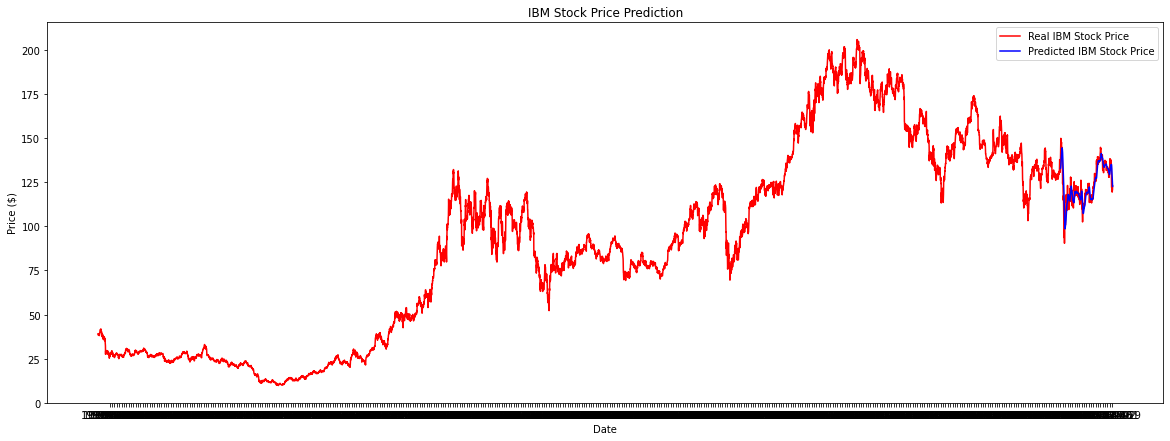

In [20]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1800:], df_volume[1800:], color = 'red', label = 'Real IBM Stock Price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted IBM Stock Price')
plt.xticks(np.arange(100,df[1800:].shape[0],20))
plt.title('IBM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()